In [1]:
import pandas as pd
import datetime
from Munger import clean_data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from sklearn.cross_validation import train_test_split
%matplotlib inline

In [2]:
M = clean_data()
X, X_test = M.data_split()
y = M.label_transformer()

In [3]:
A = M.get_train_data()

In [4]:
master_diff = {}
master_hist = {}
columns = []
exclude = ['tfa_year','tfa_month','tfa_day', 'country_destination', 'timedelta','y']
hist_countries = np.bincount(y)/float(len(y))
for column in A.columns:
    if column in exclude:
        continue
    columns.append(column)
    for data in A[column].unique():
        s = A[A[column]==data]
        hist = np.bincount(M.label_transformer(labels = s.y.values),minlength=12)/float(len(s))
        master_diff['{}__{}_{}_{}'.format(column, data, len(s), int(len(s)/float(len(A))*100))] = hist - hist_countries
        master_hist['{}__{}_{}_{}'.format(column, data, len(s), int(len(s)/float(len(A))*100))] = hist 

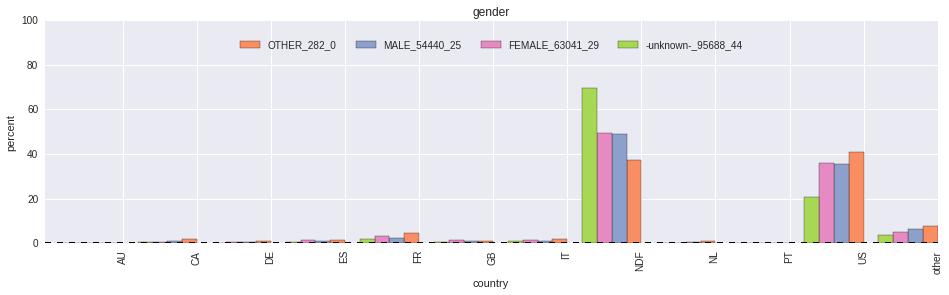

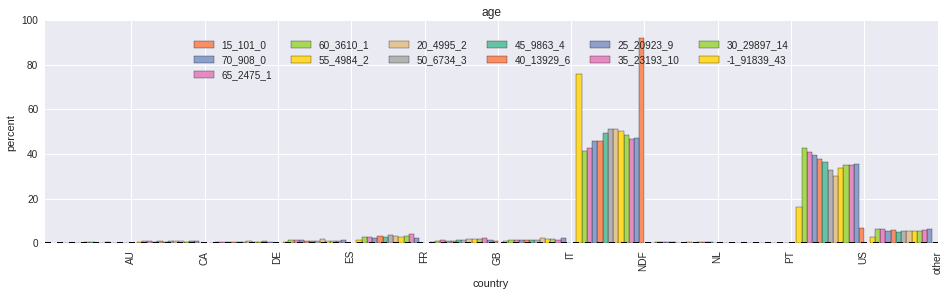

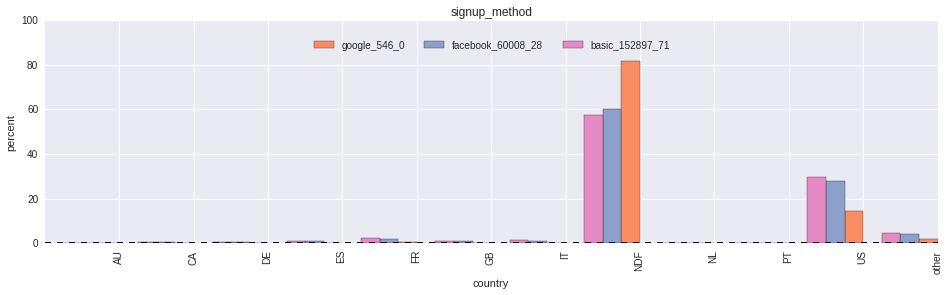

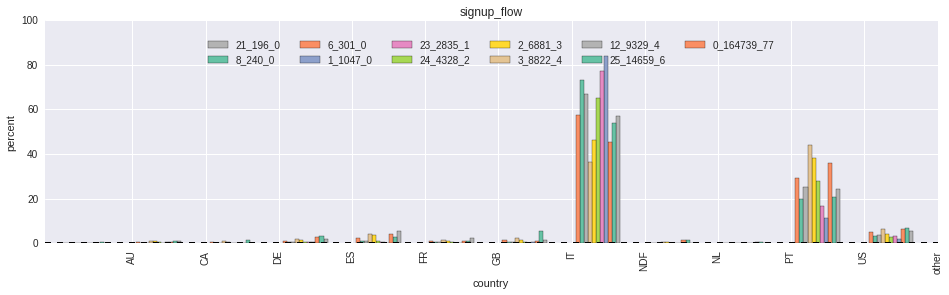

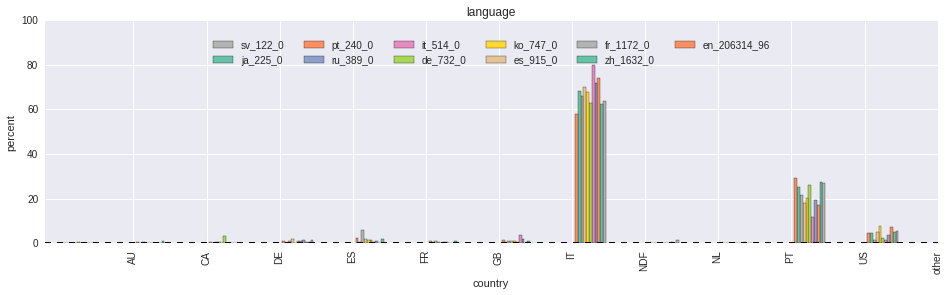

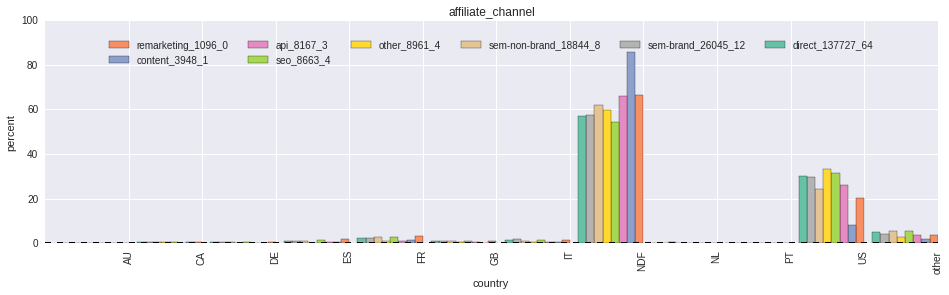

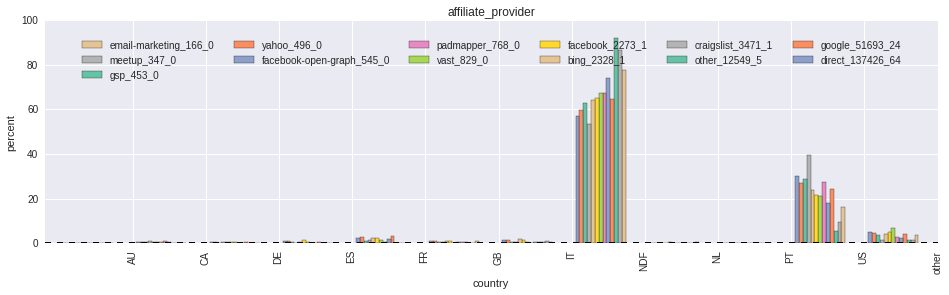

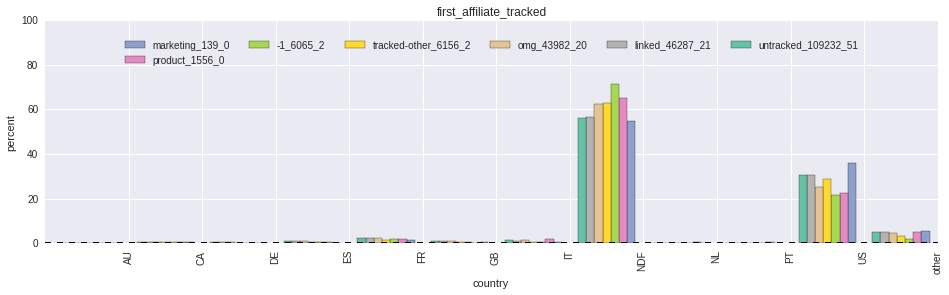

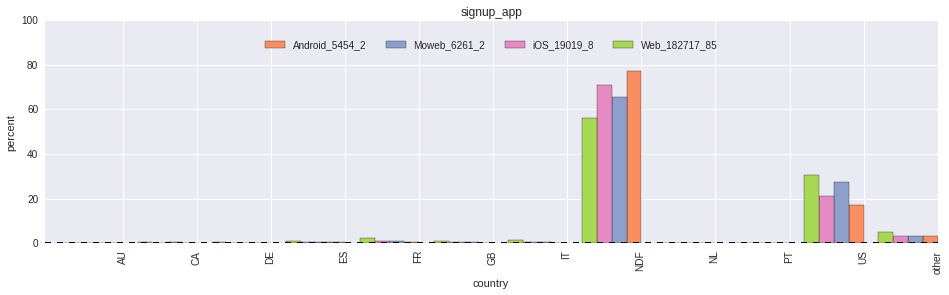

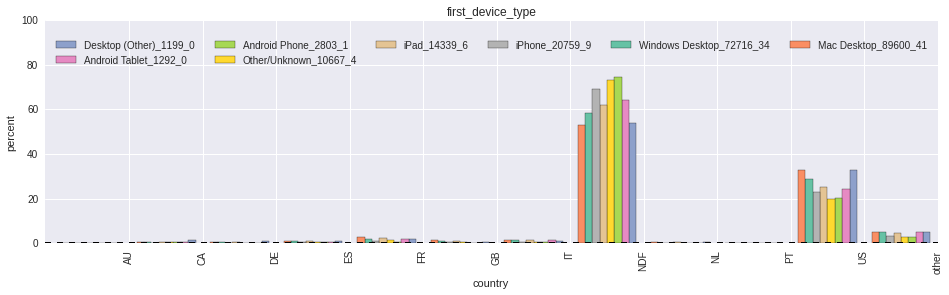

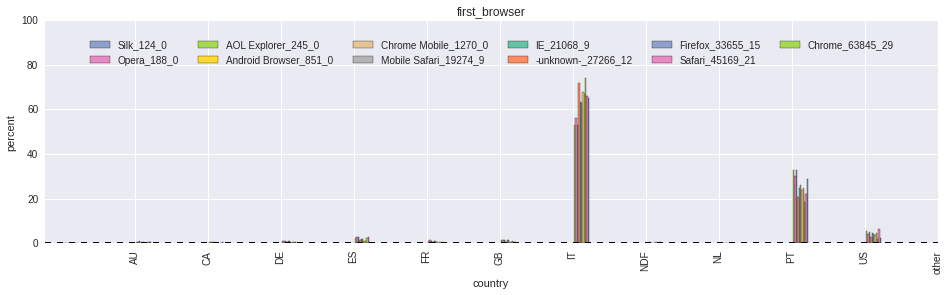

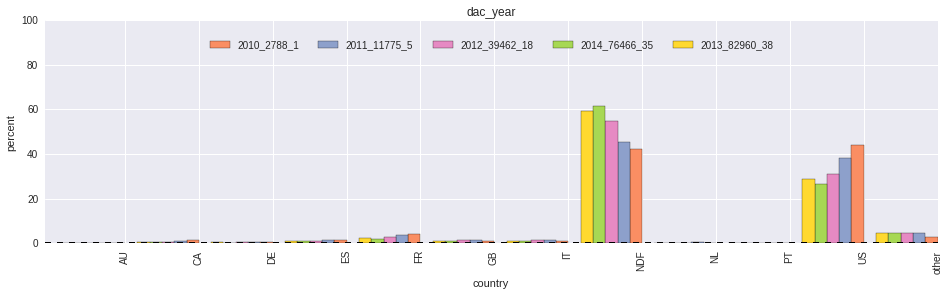

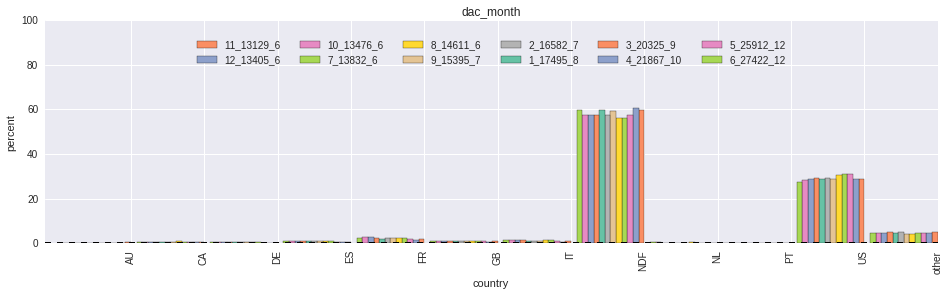

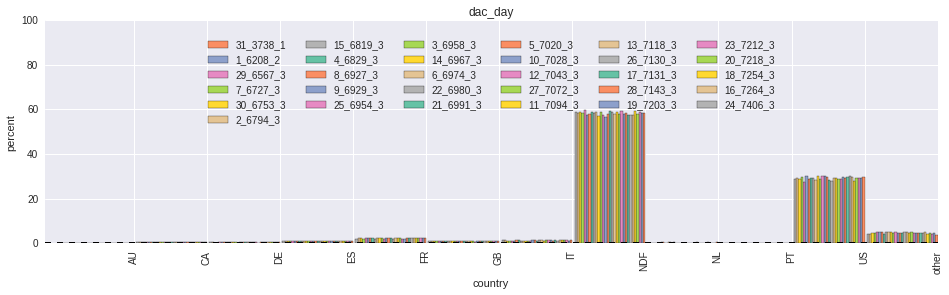

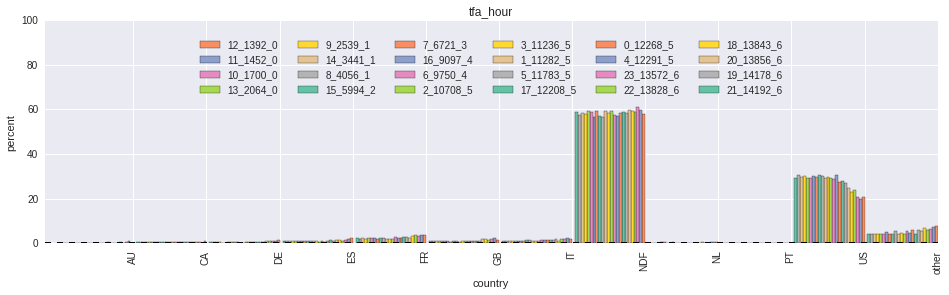

In [25]:
cutoff=100
dt = 5
A_des = pd.DataFrame(master_hist)*100
for name in columns:
    count = 0
    colors = sns.color_palette("Set2", len(A[name].unique())+1)
    width = 1./len(colors)
    fig, ax = plt.subplots(figsize=(16,4))
    for col in sorted(A_des.columns, key= lambda x: int(x.split('_')[-2])):
        if name == col.split('__')[0]:
            count+=1
            total_count = int(col.split('_')[-2])
            if total_count > cutoff:
                A_des[col].plot(ax=ax, kind='bar', position=count, width=width, color=colors[count], label=col.split('__')[-1])
            
    labels = [item.get_text() for item in ax.get_xticklabels()]

    for i in range(len(labels)):
        labels[i] = M.label_inverse_transformer([i])[0]

    plt.title(name)
    plt.ylabel('percent')
    plt.xlabel('country')
    ax.set_xticklabels(labels)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, .95),
          ncol=6, fancybox=True, shadow=True)
    sns.despine()
    plt.ylim(0,100)
    plt.show()

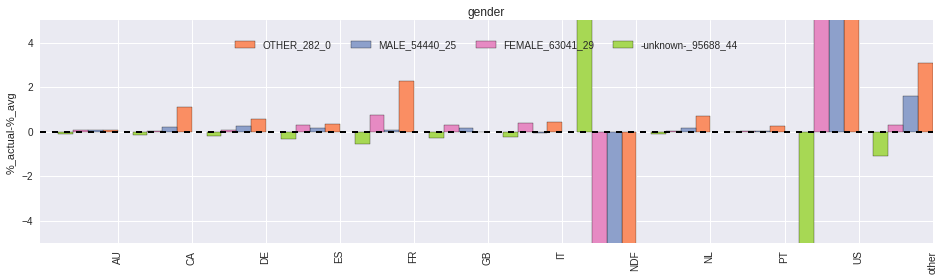

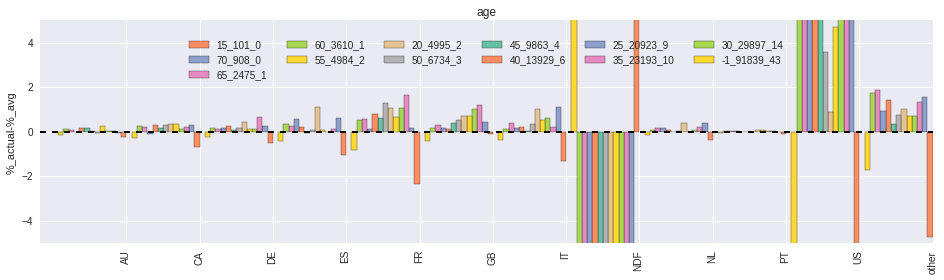

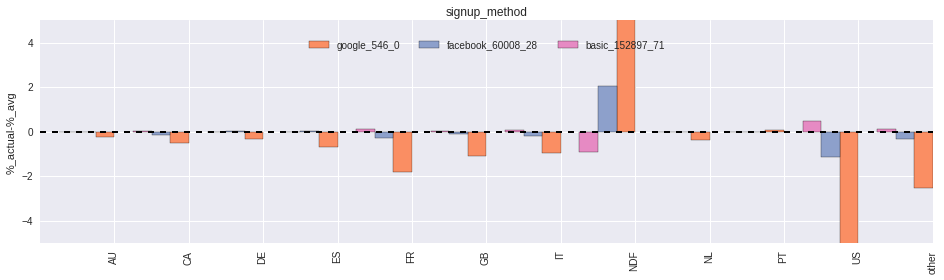

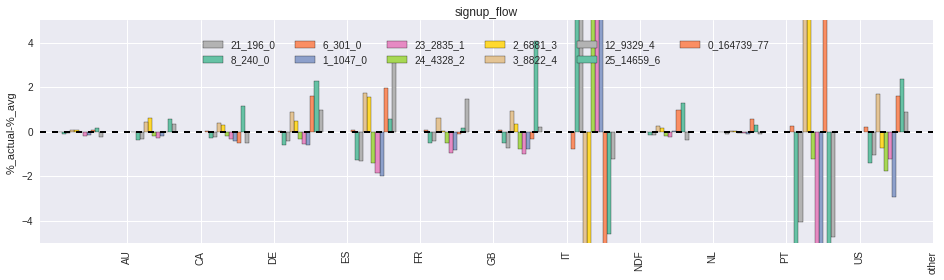

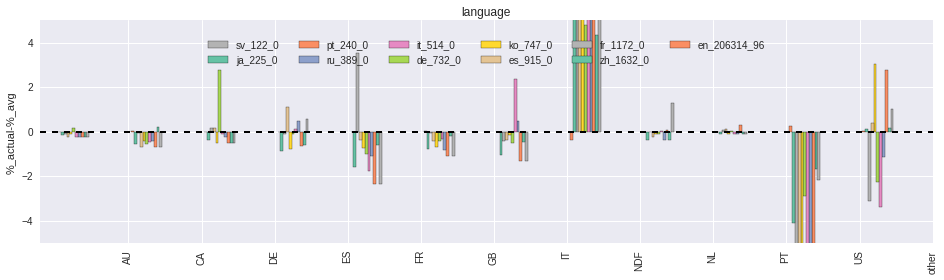

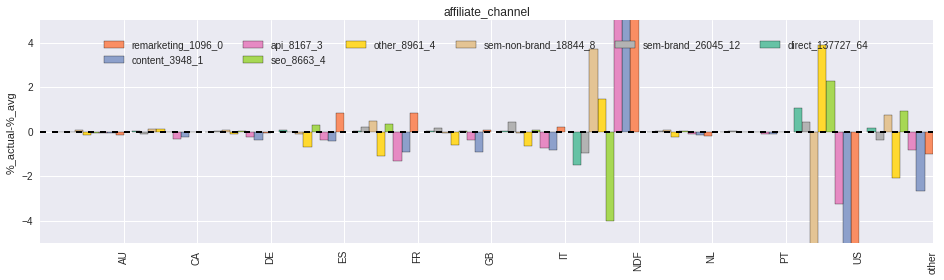

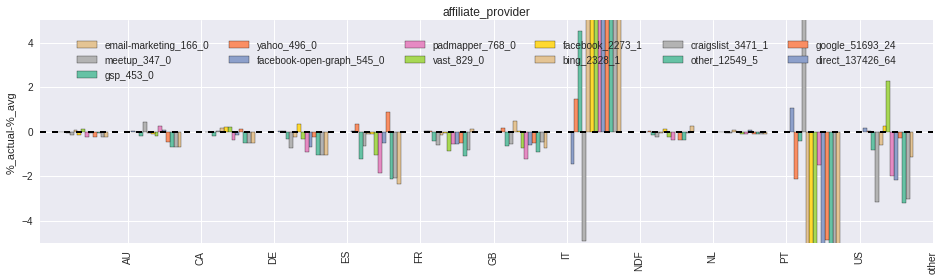

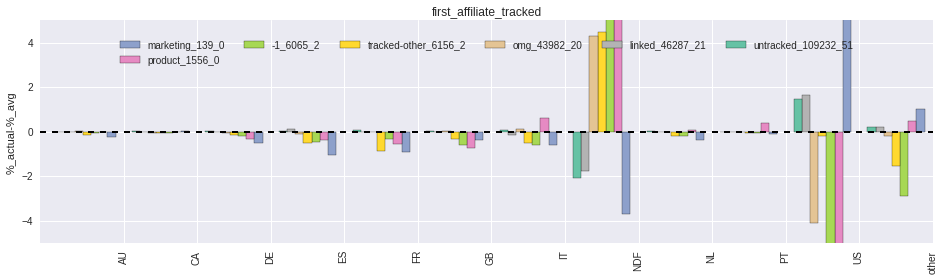

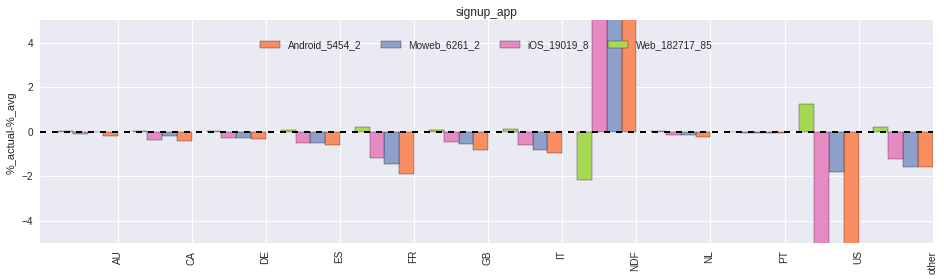

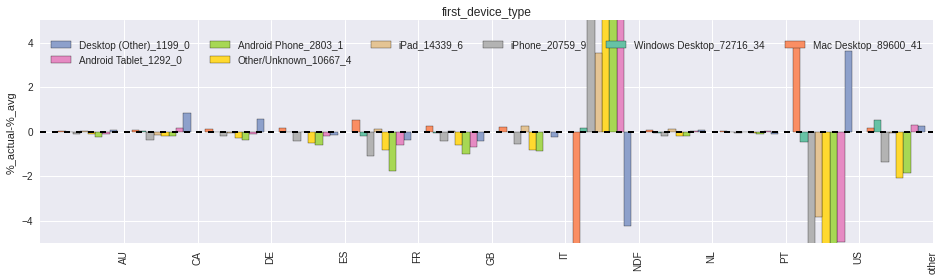

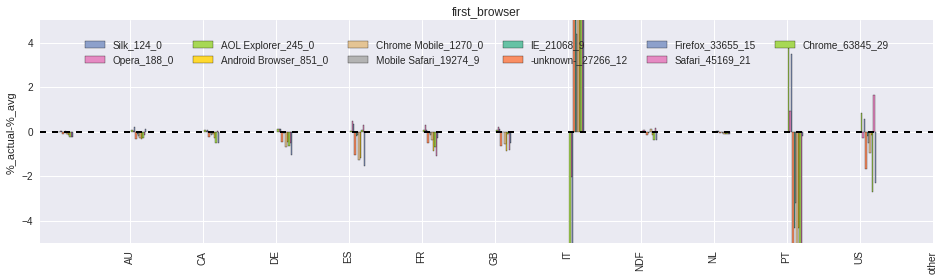

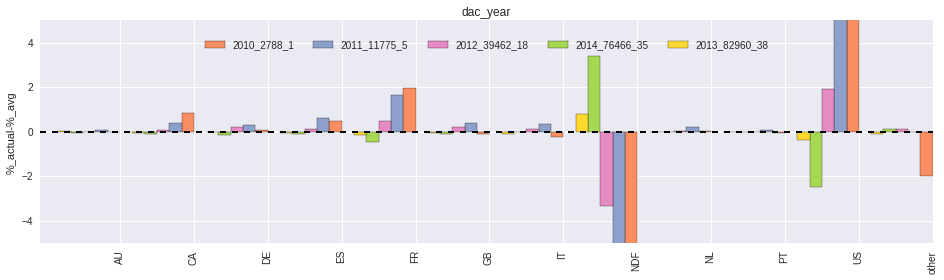

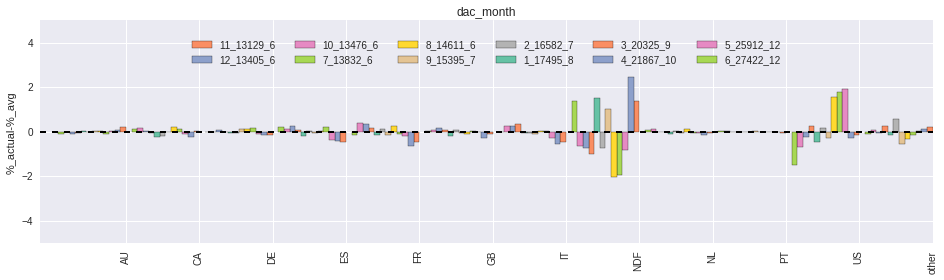

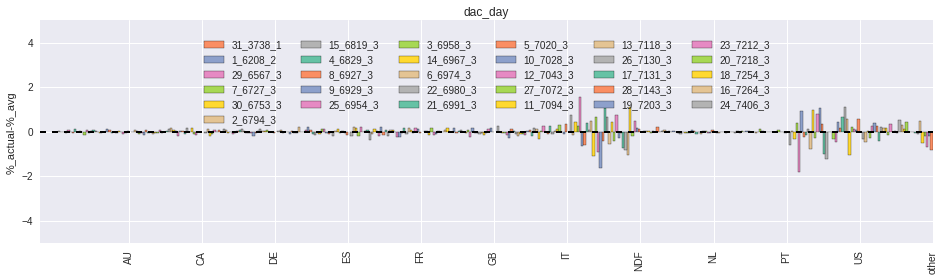

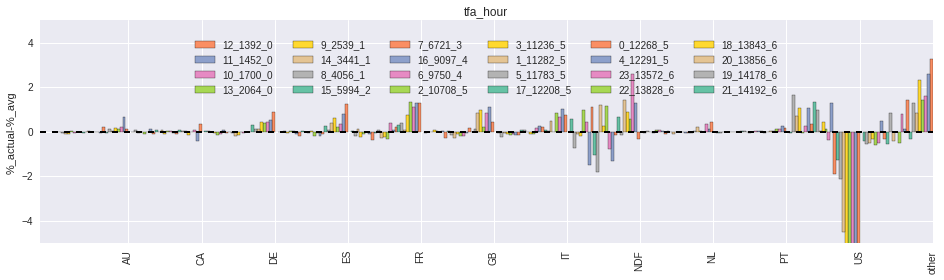

In [27]:
A_des = pd.DataFrame(master_diff)*100
for name in columns:
    count = 0
    colors = sns.color_palette("Set2", len(A[name].unique())+1)
    width = 1./len(colors)
    fig, ax = plt.subplots(figsize=(16,4))
    for col in sorted(A_des.columns, key= lambda x: int(x.split('_')[-2])):
        if name == col.split('__')[0]:
            count+=1
            total_count = int(col.split('_')[-2])
            if total_count > cutoff:
                A_des[col].plot(ax=ax, kind='bar', position=count, width=width, color=colors[count], label=col.split('__')[-1])
            
    labels = [item.get_text() for item in ax.get_xticklabels()]

    for i in range(len(labels)):
        labels[i] = M.label_inverse_transformer([i])[0]

    plt.title(name)
    plt.ylabel('%_actual-%_avg')
    ax.set_xticklabels(labels)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, .95),
          ncol=6, fancybox=True, shadow=True)
    sns.despine()
    dt = 5
    plt.ylim(-dt,dt)
    plt.show()